In [29]:
import pandas as pd
import numpy as np
import networkx as nx
import nltk
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import cross_val_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob  # For sentiment analysis, if text data exists
import warnings
warnings.filterwarnings("ignore")
# For inline plotting
%matplotlib inline

In [31]:
import pandas as pd

# Load the dataset with full file path (adjust if needed)
df = pd.read_csv("/Users/Kwach/Downloads/Students Social Media Addiction.csv")


In [33]:
# Step 1: Load the Dataset
def load_data(file_path):
    """Load CSV file and handle common issues."""
    try:
        ddf = pd.read_csv("/Users/Kwach/Downloads/Students Social Media Addiction.csv")
        print("Dataset loaded successfully. Columns:", df.columns.tolist())
        print("Sample data:\n", df.head())
        return df
    except FileNotFoundError:
        print(f"Error: File {file_path} not found. Please check the path.")
        return None
    except pd.errors.ParserError:
        print("Error: Unable to parse CSV. Check file format.")
        return None
# View the first few rows
print(df.head())

# View column names
print("Columns:", df.columns.tolist())

# Info on types and missing values
print("\nDataset Info:")
print(df.info())

# Summary statistics for all columns
print("\nDescriptive Statistics:")
print(df.describe(include='all'))


   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Soc

In [35]:
# Define the Random Forest model
rf = RandomForestClassifier(
    n_estimators=100,      # number of trees
    max_depth=None,        # allow trees to expand fully
    random_state=42,       # reproducibility
    n_jobs=-1              # use all CPU cores
)

In [37]:
# === STEP 2: PREPROCESSING ===
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    print("\n=== Step 2: Preprocessing Data ===")
    print("Missing Values Before:", df.isnull().sum().sum())
    
    df = df.dropna()
    print("Missing Values After:", df.isnull().sum().sum())

    # Encode categorical columns
    categorical_cols = [
        'Gender', 'Academic_Level', 'Country', 'Most_Used_Platform',
        'Affects_Academic_Performance', 'Relationship_Status'
    ]

    for col in categorical_cols:
        le = LabelEncoder()
        df[col + '_encoded'] = le.fit_transform(df[col])

    return df

# Preprocess the data
df = preprocess_data(df)



=== Step 2: Preprocessing Data ===
Missing Values Before: 0
Missing Values After: 0


In [49]:
# Drop Student_ID since it's just an identifier
X = df.drop(columns=['Student_ID', 'Addicted_Score'])
y = df['Addicted_Score']


In [51]:
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()
label_encoders = {}

for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le


In [57]:
# Take one sample
sample = X_test.iloc[0:1]

# Predict
pred = rf.predict(sample)

print("Predicted Addicted_Score for sample student:", pred[0])
print("Actual Addicted_Score:", y_test.iloc[0])


Predicted Addicted_Score for sample student: 5.01
Actual Addicted_Score: 5


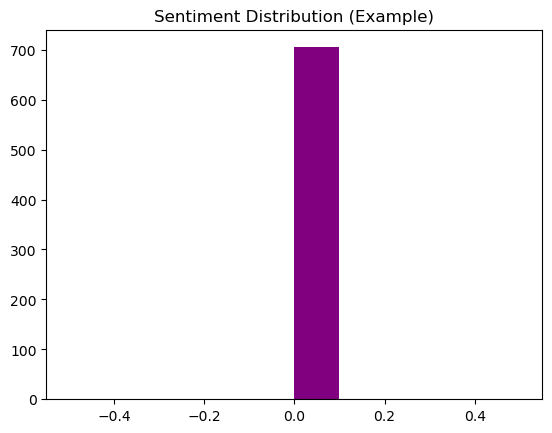

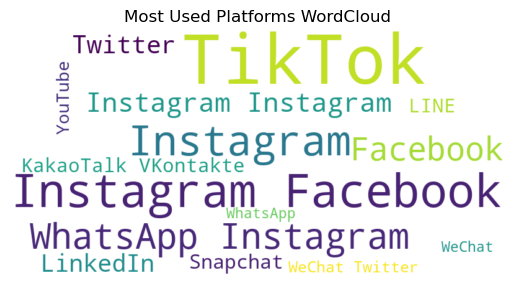

In [59]:
from wordcloud import WordCloud
from textblob import TextBlob

# Example sentiment analysis (if text data existed, e.g. student comments)
if 'Most_Used_Platform' in df.columns:
    sentiments = df['Most_Used_Platform'].apply(lambda x: TextBlob(x).sentiment.polarity)
    plt.hist(sentiments, bins=10, color='purple')
    plt.title("Sentiment Distribution (Example)")
    plt.show()

# WordCloud for platforms
text = " ".join(df['Most_Used_Platform'])
wc = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Most Used Platforms WordCloud")
plt.show()


In [71]:

rf = RandomForestRegressor(random_state=42, n_estimators=200)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation on Test Set:")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

sample = X_test.iloc[0:1]
pred = rf.predict(sample)

print("\n🎯 Prototype Demo")
print("Predicted Addicted_Score:", round(pred[0], 2))
print("Actual Addicted_Score:", y_test.iloc[0])

📊 Model Evaluation on Test Set:
RMSE: 0.206
R² Score: 0.983

🎯 Prototype Demo
Predicted Addicted_Score: 5.0
Actual Addicted_Score: 5


In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [83]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

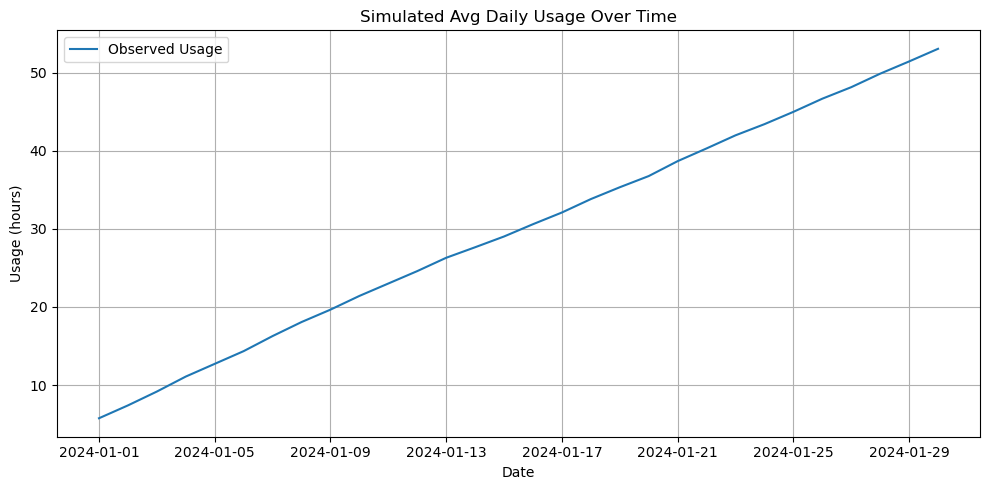

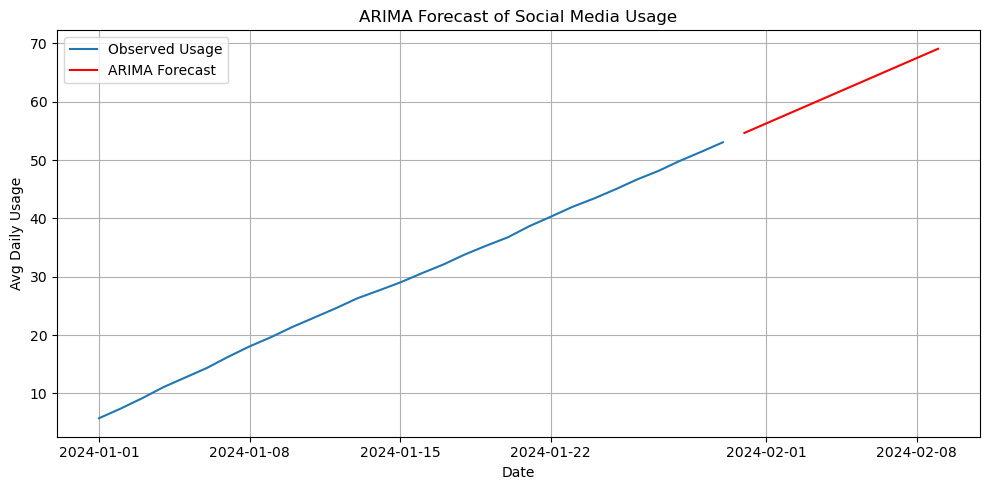

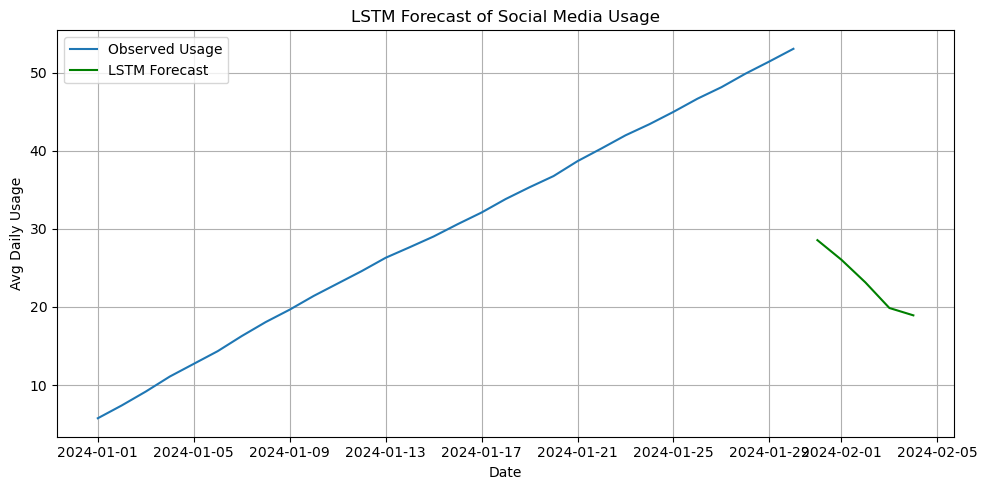

In [15]:
# Time series
np.random.seed(42)
dates = pd.date_range(start='2024-01-01', periods=30, freq='D')
usage = np.random.normal(loc=5, scale=0.5, size=30).cumsum() / 3 + 4

# Create DataFrame
df_ts = pd.DataFrame({'Date': dates, 'Avg_Daily_Usage': usage})
df_ts.set_index('Date', inplace=True)

# Plot original time series
plt.figure(figsize=(10, 5))
plt.plot(df_ts.index, df_ts['Avg_Daily_Usage'], label='Observed Usage')
plt.title('Simulated Avg Daily Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Usage (hours)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Fit ARIMA model
model = ARIMA(df_ts['Avg_Daily_Usage'], order=(1, 1, 1))  # Adjust order if needed
model_fit = model.fit()

# Forecast next 10 days
forecast = model_fit.forecast(steps=10)
forecast_index = pd.date_range(start=df_ts.index[-1] + pd.Timedelta(days=1), periods=10, freq='D')

# Plot ARIMA forecast
plt.figure(figsize=(10, 5))
plt.plot(df_ts.index, df_ts['Avg_Daily_Usage'], label='Observed Usage')
plt.plot(forecast_index, forecast, label='ARIMA Forecast', color='red')
plt.title("ARIMA Forecast of Social Media Usage")
plt.xlabel("Date")
plt.ylabel("Avg Daily Usage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_ts[['Avg_Daily_Usage']])

# Prepare training data
X, y = [], []
n_steps = 3
for i in range(n_steps, len(scaled_data)):
    X.append(scaled_data[i - n_steps:i])
    y.append(scaled_data[i])
X, y = np.array(X), np.array(y)

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, verbose=0)

# Forecast next 5 days
x_input = scaled_data[-n_steps:].reshape((1, n_steps, 1))
lstm_forecast = []

for _ in range(5):
    yhat = model.predict(x_input, verbose=0)
    lstm_forecast.append(yhat[0][0])
    
    # Fix the shape for appending
    x_input = np.append(x_input[:, 1:, :], yhat.reshape(1, 1, 1), axis=1)


# Inverse transform and create forecast index
lstm_forecast = scaler.inverse_transform(np.array(lstm_forecast).reshape(-1, 1))
lstm_index = pd.date_range(start=df_ts.index[-1] + pd.Timedelta(days=1), periods=5, freq='D')

# Plot LSTM forecast
plt.figure(figsize=(10, 5))
plt.plot(df_ts.index, df_ts['Avg_Daily_Usage'], label='Observed Usage')
plt.plot(lstm_index, lstm_forecast, label='LSTM Forecast', color='green')
plt.title("LSTM Forecast of Social Media Usage")
plt.xlabel("Date")
plt.ylabel("Avg Daily Usage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


=== Step 3: Data Visualization ===

Plot 1: Correlation Heatmap


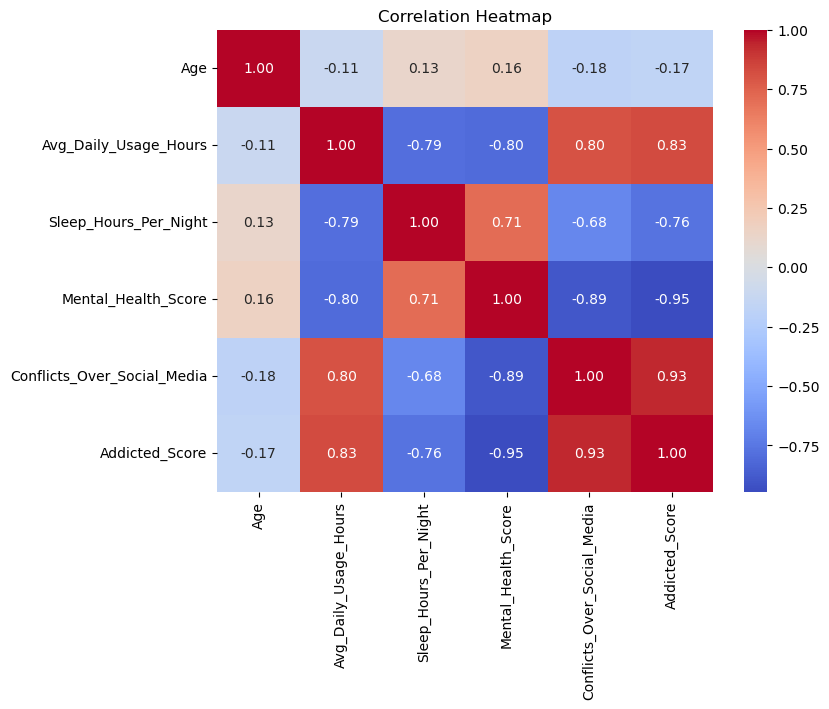


Plot 2: Addicted Score Distribution


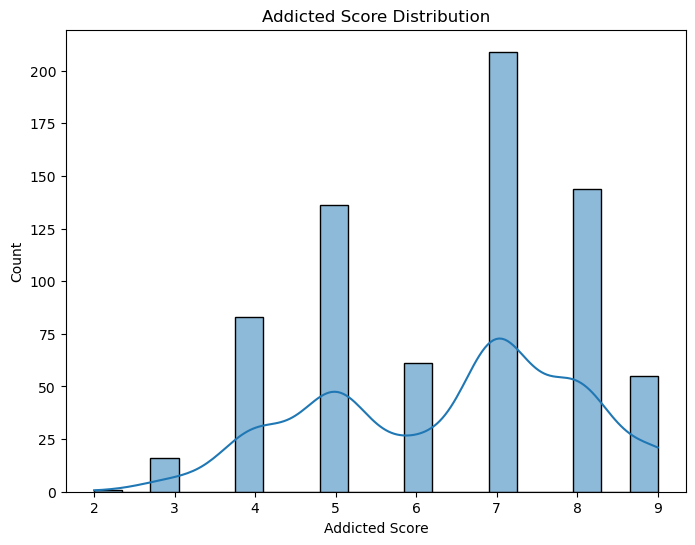


Plot 3: Addicted Score by Platform


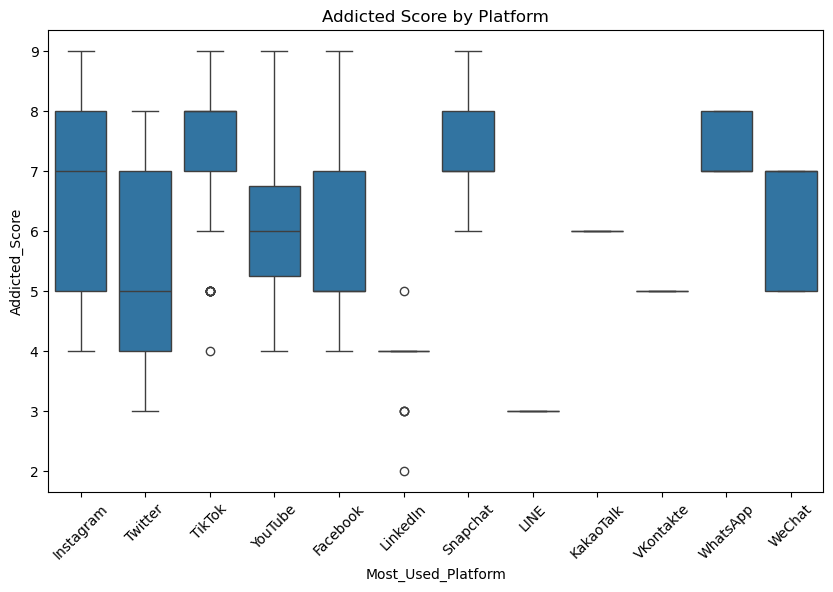

In [16]:
# === Cell 4: Data Visualization ===

def visualize_data(df):
    print("\n=== Step 3: Data Visualization ===")
    
    num_cols = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 
                'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']
    
    print("\nPlot 1: Correlation Heatmap")
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
    
    print("\nPlot 2: Addicted Score Distribution")
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Addicted_Score'], kde=True, bins=20)
    plt.title('Addicted Score Distribution')
    plt.xlabel('Addicted Score')
    plt.show()
    
    print("\nPlot 3: Addicted Score by Platform")
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Most_Used_Platform', y='Addicted_Score', data=df)
    plt.xticks(rotation=45)
    plt.title('Addicted Score by Platform')
    plt.show()

visualize_data(df)


In [109]:
def feature_engineering(df):
    print("\n=== Step 3: Feature Engineering ===")
    if 'Addicted_Score' not in df.columns:
        raise ValueError("Missing 'Addicted_Score' column for classification target.")
    df['is_high_addiction'] = (df['Addicted_Score'] > df['Addicted_Score'].median()).astype(int)
    print("Added binary target column: 'is_high_addiction'")
    return df



=== Step 2: Preprocessing Data ===
Missing Values Before: 0
Missing Values After: 0

=== Step 3: Feature Engineering ===
Added binary target column: 'is_high_addiction'

=== Step 4: Classification Model (Random Forest) ===


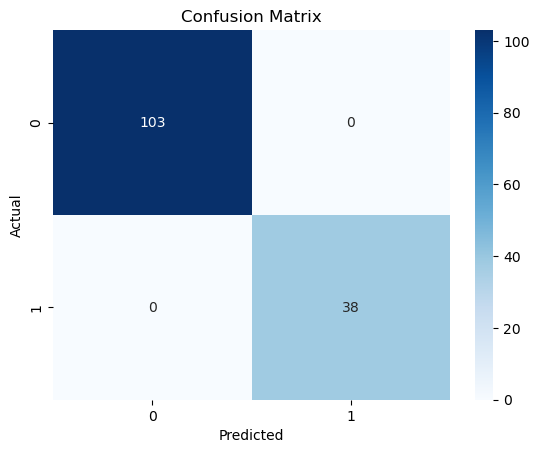


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        38

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



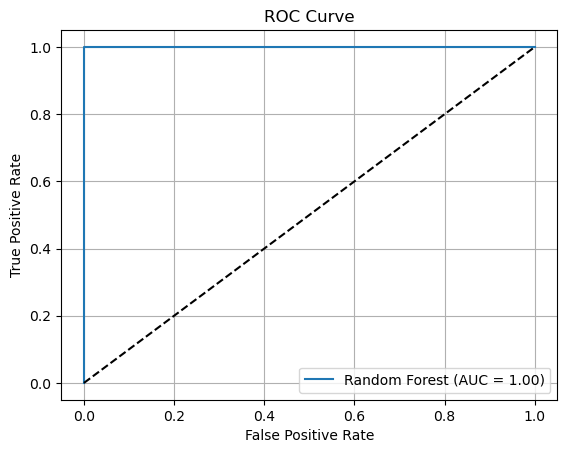

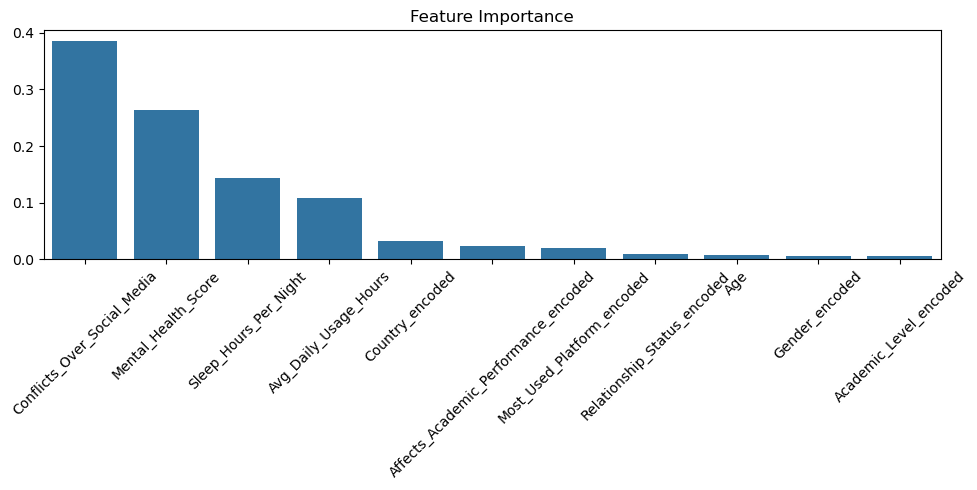

In [111]:
# === Cell 5: Train Classification Models ===

def train_classification_model(df):
    print("\n=== Step 4: Classification Model (Random Forest) ===")

    # Define features and target
    features = [
        'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
        'Mental_Health_Score', 'Conflicts_Over_Social_Media',
        'Gender_encoded', 'Academic_Level_encoded', 'Country_encoded',
        'Most_Used_Platform_encoded', 'Affects_Academic_Performance_encoded',
        'Relationship_Status_encoded'
    ]

    # Check for missing features
    missing = [f for f in features if f not in df.columns]
    if missing:
        raise KeyError(f"Missing columns: {missing}")

    X = df[features]
    y = df['is_high_addiction']

    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Predictions
    y_pred = rf.predict(X_test)
    y_prob = rf.predict_proba(X_test)[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Feature Importance
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 5))
    sns.barplot(x=[features[i] for i in indices], y=importances[indices])
    plt.title("Feature Importance")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return rf

# === RUN THE PIPELINE ===

# Assuming df is already loaded (e.g., df = pd.read_csv("yourfile.csv"))
df = preprocess_data(df)
df = feature_engineering(df)
model = train_classification_model(df)


=== Step 5: Network Graph ===
Nodes: 705, Edges: 52662


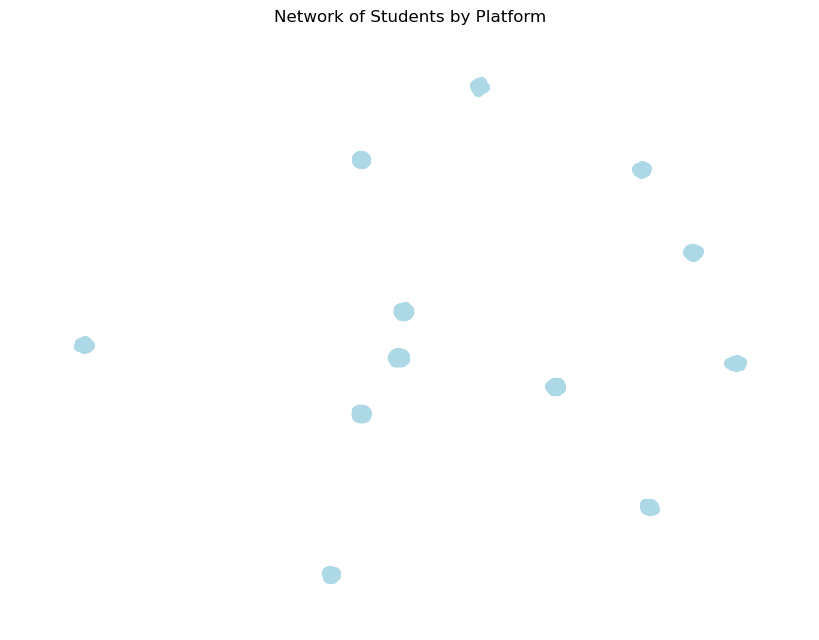

In [113]:
# === Cell 6: Network Analysis ===

def network_analysis(df):
    print("\n=== Step 5: Network Graph ===")
    G = nx.Graph()
    for platform in df['Most_Used_Platform'].unique():
        users = df[df['Most_Used_Platform'] == platform]['Student_ID']
        for i, u1 in enumerate(users):
            for u2 in users[i+1:]:
                G.add_edge(u1, u2)
    
    print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")
    plt.figure(figsize=(8, 6))
    nx.draw(G, node_size=50, node_color='lightblue', edge_color='gray', with_labels=False)
    plt.title('Network of Students by Platform')
    plt.show()

network_analysis(df)
